In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
heart_disease = pd.read_csv(r"C:\Users\Meiyappan\Desktop\Data Science-Jupyter Notebook\Kaggle\heart_disease_dataset.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_disease.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [5]:
# Null values

heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

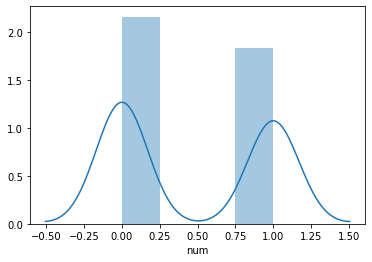

In [6]:
# Outliers

sns.distplot(heart_disease["num"])

In [7]:
# Scaling - No need of scaling

In [8]:
# Categorical transformation - no need to transfor the data

In [9]:
correlation = heart_disease.corr()

correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.085766,0.017545,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,-0.079361,0.031518,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.019134,-0.028985,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,-0.010263,0.017149,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.068128,0.057866,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,-0.032997,-0.080552,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.057077,-0.000807,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.038729,0.050287,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.018935,-0.030035,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.091285,0.038027,0.424510


In [10]:
x = heart_disease.drop(["num"], axis=1)

y = heart_disease["num"]

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [12]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy="minority", random_state=100)

x_train, y_train = sm.fit_sample(x_train, y_train)

In [13]:
# no need to balance the data

y_train.value_counts()

1    130
0    130
Name: num, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

C:\Users\Meiyappan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
lr.predict(x_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [16]:
lr.predict_proba(x_test)

array([[0.16191498, 0.83808502],
       [0.14223437, 0.85776563],
       [0.77713091, 0.22286909],
       [0.76127601, 0.23872399],
       [0.60818637, 0.39181363],
       [0.8147696 , 0.1852304 ],
       [0.21620816, 0.78379184],
       [0.65028059, 0.34971941],
       [0.58719305, 0.41280695],
       [0.87316113, 0.12683887],
       [0.86625221, 0.13374779],
       [0.09379522, 0.90620478],
       [0.14091092, 0.85908908],
       [0.69080616, 0.30919384],
       [0.03623981, 0.96376019],
       [0.34983114, 0.65016886],
       [0.05048814, 0.94951186],
       [0.40417664, 0.59582336],
       [0.67982341, 0.32017659],
       [0.33938562, 0.66061438],
       [0.0885807 , 0.9114193 ],
       [0.54735282, 0.45264718],
       [0.14512482, 0.85487518],
       [0.40110908, 0.59889092],
       [0.92367003, 0.07632997],
       [0.50098994, 0.49901006],
       [0.34947998, 0.65052002],
       [0.36550991, 0.63449009],
       [0.62428541, 0.37571459],
       [0.03524341, 0.96475659],
       [0.

In [17]:
metrics.confusion_matrix(y_test, lr.predict(x_test))

array([[26,  8],
       [ 5, 22]], dtype=int64)

In [18]:
print(metrics.classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        34
           1       0.73      0.81      0.77        27

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [19]:
#predict proabability score should be provided

# 0 - Low Loss & 1 - high loss

metrics.log_loss(y_test, lr.predict_proba(x_test))

0.4349132733877212

In [20]:
metrics.roc_auc_score(y_test, lr.predict(x_test))

0.7897603485838779

In [21]:
FPR, TPR, threshold = metrics.roc_curve(y_test, lr.predict(x_test))

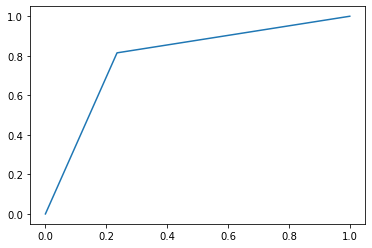

In [22]:
plt.plot(FPR, TPR)

In [25]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lr, x_test, y_test, cv=5)

cvs

C:\Users\Meiyappan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Meiyappan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

array([1.        , 0.91666667, 0.83333333, 0.75      , 0.83333333])

In [26]:
cvs.mean()

0.8666666666666666